In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data= pd.read_csv("/content/cardio.csv")

In [ ]:
data.head() #response variableis cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
y= data["cardio"]

In [ ]:
X= data[["age","gender", "height","weight","ap_hi", "ap_lo", "cholesterol","gluc","smoke", "alco","active"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
logreg = LogisticRegression(random_state=123)

In [ ]:
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
#confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[6452, 2347],
       [2907, 5794]])

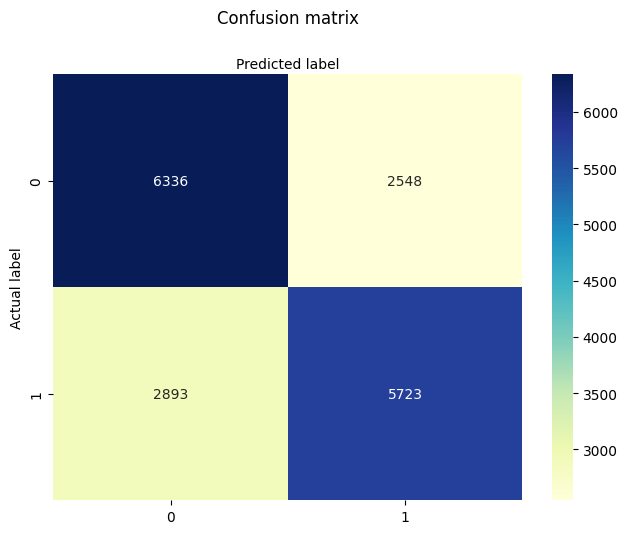

In [ ]:
#visualisation of confusion matrix
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#evaluation of model
from sklearn.metrics import classification_report
target_names = ['absence of cardiovascular disease', 'presence of cardiovascular disease']
print(classification_report(y_test, y_pred, target_names=target_names))

#70% accuracy

                                    precision    recall  f1-score   support

 absence of cardiovascular disease       0.69      0.73      0.71      8799
presence of cardiovascular disease       0.71      0.67      0.69      8701

                          accuracy                           0.70     17500
                         macro avg       0.70      0.70      0.70     17500
                      weighted avg       0.70      0.70      0.70     17500



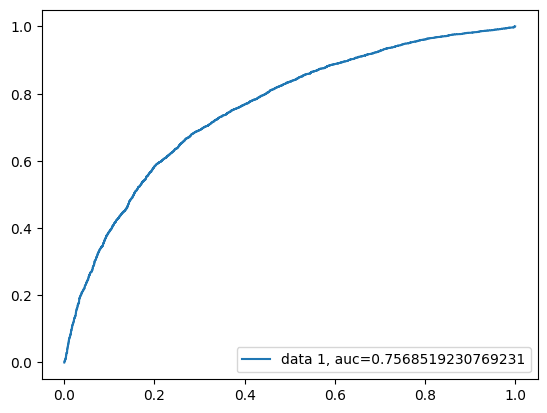

In [ ]:
#ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
#auc score is 0.75 which is decent